In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
# 1. Load CIFAR-10 dataset and normalize
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


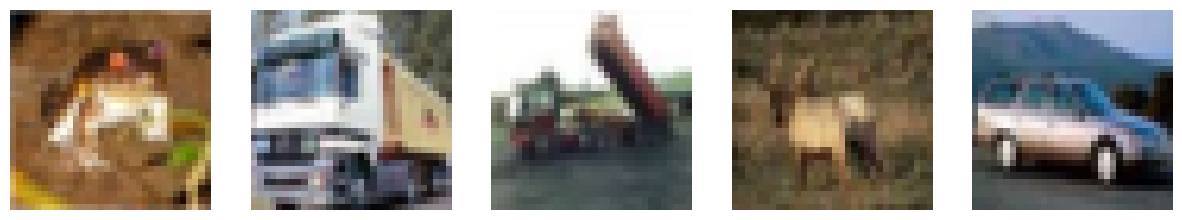

In [4]:
# 2. Display first few images to check the data
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()

In [5]:
# 3. Build CNN model with Dropout
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Added Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

c:\Users\amitr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 4. Compile the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
# 5. Train the model for 10 epochs
history = cnn.fit(x_train, y_train, epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3574 - loss: 1.7299 - val_accuracy: 0.5290 - val_loss: 1.3560
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4652 - loss: 1.4666 - val_accuracy: 0.5725 - val_loss: 1.2291
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5092 - loss: 1.3516 - val_accuracy: 0.5885 - val_loss: 1.1663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5381 - loss: 1.2731 - val_accuracy: 0.6180 - val_loss: 1.0808
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5608 - loss: 1.2212 - val_accuracy: 0.6393 - val_loss: 1.0462
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5798 - loss: 1.1679 - val_accuracy: 0.6513 - val_loss: 1.0134
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5920 - loss: 1.1322 - val_accuracy: 0.6618 - val_loss: 0.9907
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6101 - loss: 1.0840 - 

In [8]:
# 6. Evaluate the model on the test data
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6878 - loss: 0.9111

✅ Final Test Accuracy: 68.78%


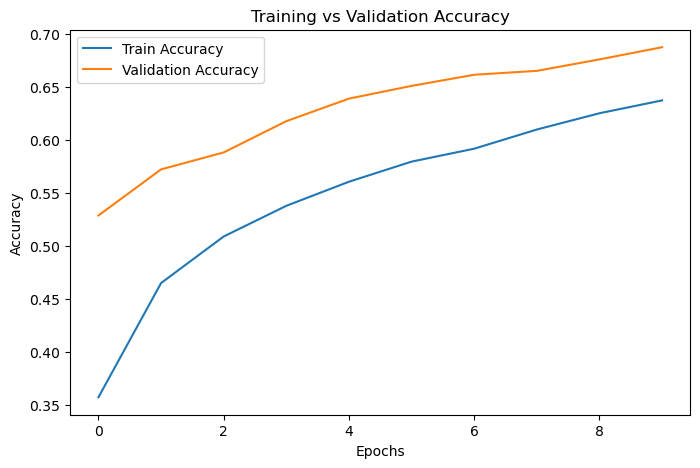

In [9]:
# 7. Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

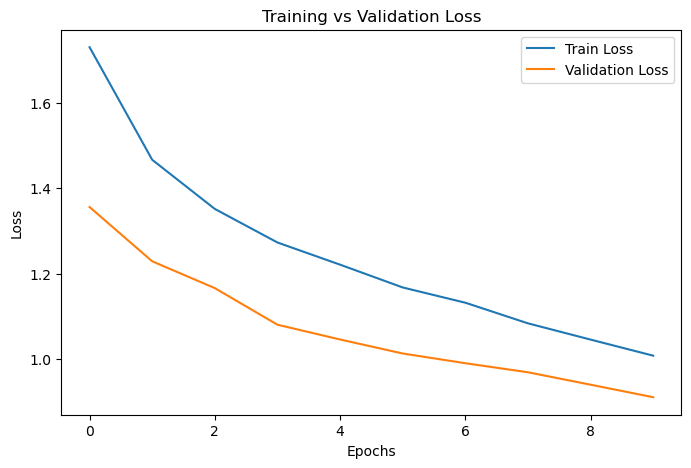

In [10]:
# 8. Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [11]:
# # Part A: CNN – Image Classification (CIFAR-10)
# # ---------------------------------------------

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt

# # 1. Load CIFAR-10 dataset and normalize
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # 2. Display first few images to check the data
# fig, axes = plt.subplots(1, 5, figsize=(15, 15))
# for i in range(5):
#     axes[i].imshow(x_train[i])
#     axes[i].axis('off')
# plt.show()

# # 3. Build CNN model with Dropout
# cnn = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),  # Added Dropout to prevent overfitting
#     layers.Dense(10, activation='softmax')
# ])

# # 4. Compile the model
# cnn.compile(optimizer='adam',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])

# # 5. Train the model for 10 epochs
# history = cnn.fit(x_train, y_train, epochs=10,
#                   validation_data=(x_test, y_test))

# # 6. Evaluate the model on the test data
# test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
# print(f"\n✅ Final Test Accuracy: {test_accuracy * 100:.2f}%")

# # 7. Plot training & validation accuracy
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training vs Validation Accuracy')
# plt.show()

# # 8. Plot training & validation loss
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training vs Validation Loss')
# plt.show()
